In [221]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

# SVM - Lineal

Función de pérdida:
$$Loss = \frac{1}{n}\sum_{i=1}^n \max(0,1-y_i(Ax_i-b))+\alpha||A||^2$$

- $A$: es el vector de las pendientes en cada variable 
- $b$: es la ordenada en el origen (intercept)
- $x=(x_1,x_2,\cdots, x_n)$ es el vector de datos
- $y_i$ es la clase del objeto (-1 o 1)
- $\alpha$: coeficiente de regularización y suavizado de la separación

In [222]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

x_vals = np.array(x_vals, dtype='float32')
y_vals = np.array(y_vals, dtype='float32')

#Valores de los hiperparametros
batch_size = 100
learning_rate=0.02

In [223]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]

In [224]:
# Definir variables y modelo
class Model(tf.Module):
    def __init__(self):
        self.A = tf.Variable(tf.random.normal(shape=[2, 1], dtype=tf.float32), name='A')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
    
    def __call__(self, x2_data):
        return tf.add(tf.matmul(x2_data, self.A), self.b)

model = Model()

In [225]:
# Definir la pérdida y el optimizador

loss_=[]
accuracy_=[]
def loss_fn(model, x2_data, y_target):

    l2_norm = tf.reduce_sum(tf.square(model.A.numpy()[0][0]))
    alpha = tf.constant([0.1])
    classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model(x2_data), y_target))))
    loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
    prediction = tf.sign(model(x2_data))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
    loss_.append(loss)
    accuracy_.append(accuracy)


    return tf.reduce_mean(loss)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [226]:
def train_step(model, x2_data, y_target):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x2_data, y_target)
    gradients = tape.gradient(loss, [model.A, model.b])
    optimizer.apply_gradients(zip(gradients, [model.A, model.b]))

In [227]:
for i in range(600):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    train_step(model, rand_x, rand_y)
    if (i + 1) % 200 == 0:
        print('Paso #' + str(i + 1) + ", A=" + str(model.A.numpy()) + ", b=" + str(model.b.numpy()[0][0]))

Paso #200, A=[[ 0.16727895]
 [-1.6524998 ]], b=0.21420828
Paso #400, A=[[ 0.23079896]
 [-2.222538  ]], b=0.3296082
Paso #600, A=[[ 0.27639884]
 [-2.4943974 ]], b=0.37560827


In [228]:
loss_list = np.array(loss_)
accuracy_list = np.array(accuracy_)

In [229]:
slope = -model.A[1].numpy()/model.A[0].numpy()
y_intercept = model.b[0][0].numpy()/model.A[0].numpy()


x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i]==-1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i]==-1] 

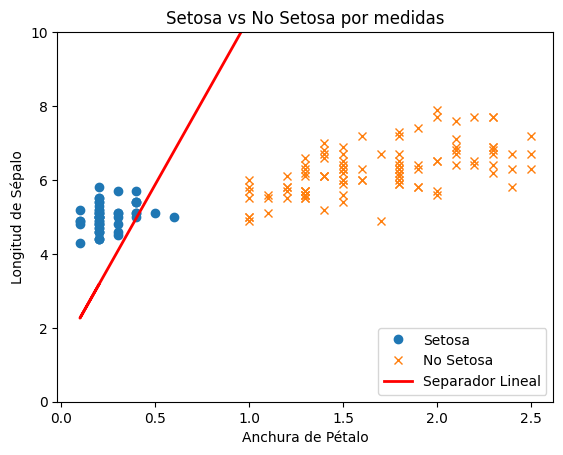

In [230]:
plt.plot(setosa_x, setosa_y, 'o', label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, 'x', label="No Setosa")
plt.plot(x1_vals, best_fit, 'r-', label = "Separador Lineal", linewidth=2)
plt.ylim([0,10])
plt.legend(loc="lower right")
plt.xlabel("Anchura de Pétalo")
plt.ylabel("Longitud de Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.show()

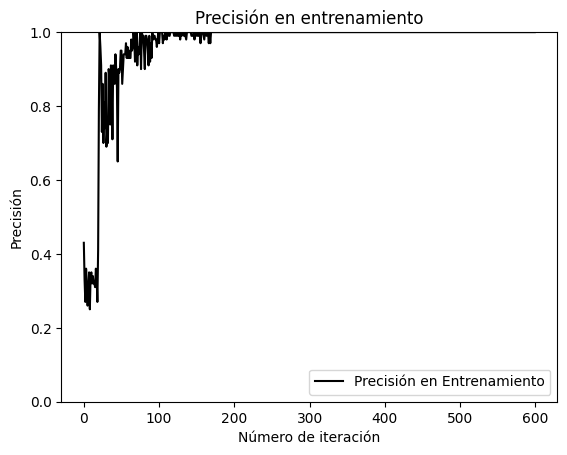

In [231]:
plt.plot(accuracy_list, 'k-', label = "Precisión en Entrenamiento")
plt.title("Precisión en entrenamiento")
plt.xlabel("Número de iteración")
plt.ylabel("Precisión")
plt.legend(loc="lower right")
plt.ylim([0,1])
plt.show()